In [275]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [276]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Redes Neuronales/Dia 30/online_course_engagement_data.csv')
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [277]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 9000
Total de variables disponibles (columnas) = 9 
Columnas que cuentan con un valor nulo -
UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64


In [278]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


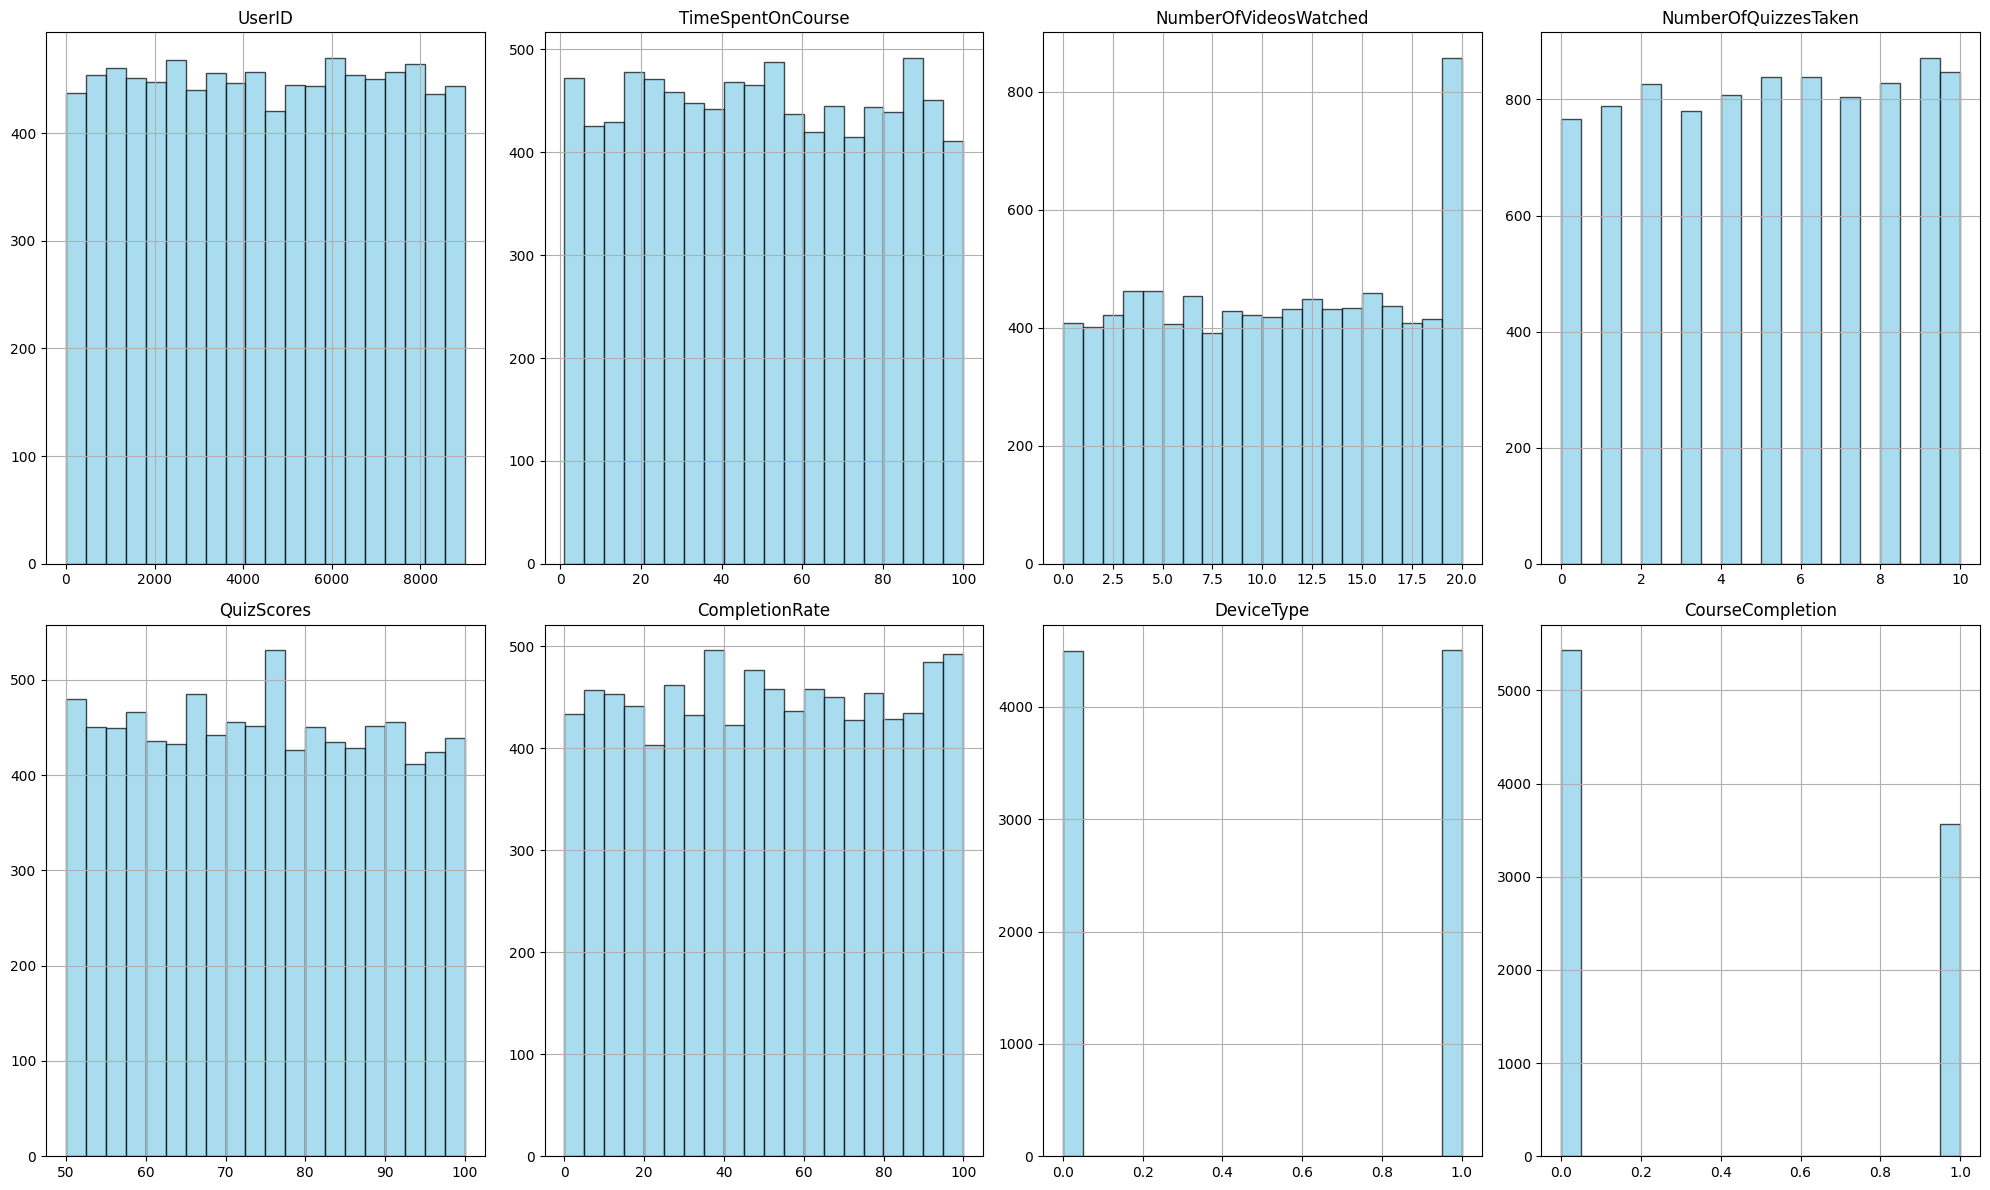

In [279]:
# Asegúrate de que los nombres de las columnas estén correctos
df2.columns = ['UserID', 'CourseCategory', 'TimeSpentOnCourse', 'NumberOfVideosWatched', 
               'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate', 'DeviceType', 
               'CourseCompletion']

# Crear histogramas mejorados, excluyendo 'CourseCategory' porque es categórico
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
df2.drop(columns='CourseCategory').hist(ax=axes, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir títulos a cada subgráfico
axes[0, 0].set_title('UserID')
axes[0, 1].set_title('TimeSpentOnCourse')
axes[0, 2].set_title('NumberOfVideosWatched')
axes[0, 3].set_title('NumberOfQuizzesTaken')
axes[1, 0].set_title('QuizScores')
axes[1, 1].set_title('CompletionRate')
axes[1, 2].set_title('DeviceType')
axes[1, 3].set_title('CourseCompletion')

# Asegurarse de que los títulos se muestren correctamente
plt.tight_layout()
plt.show()

In [280]:
# Asegúrate de que los nombres de las columnas estén correctos
numeric_features = ['TimeSpentOnCourse', 'NumberOfVideosWatched', 
               'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate']
categorical_features = ['CourseCategory']

In [281]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features]) # type: ignore

In [282]:
# One-Hot Encoding para características categóricas
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cats = enc.fit_transform(df2[categorical_features])

In [283]:
# Crear DataFrame para las características codificadas
encoded_cats_df = pd.DataFrame(encoded_cats, columns=enc.get_feature_names_out(categorical_features))
df2 = pd.concat([df2, encoded_cats_df], axis=1)

In [284]:
# One-Hot Encoding para características categóricas
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cats = enc.fit_transform(df2[categorical_features])

In [285]:
df2.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCategory_Arts,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
0,5618,Health,-0.708459,1.156859,-0.662074,-1.692939,-1.018308,1,0,0.0,0.0,1.0,0.0,0.0
1,4326,Arts,-0.784874,-1.496741,-0.028679,-0.840896,0.528242,1,0,1.0,0.0,0.0,0.0,0.0
2,5849,Arts,1.286643,0.659309,-0.978771,0.261027,0.465359,1,1,1.0,0.0,0.0,0.0,0.0
3,4992,Science,-0.530899,1.156859,1.554809,-1.078566,1.557651,0,1,0.0,0.0,0.0,0.0,1.0
4,3866,Programming,1.485664,0.991009,-1.612166,1.649947,-1.113588,0,0,0.0,0.0,0.0,1.0,0.0


# Redes Neuronales

In [286]:
# Definir X e y
X = df2.drop(columns=['UserID','CourseCategory','CourseCompletion'])
y = df2['CourseCompletion']

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [288]:
oculta = tf.keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]])
dropout = tf.keras.layers.Dropout(0.3)
oculta1 = tf.keras.layers.Dense(units=16, activation='relu')
dropout1 = tf.keras.layers.Dropout(0.3)
salida = tf.keras.layers.Dense(units=1,activation='sigmoid')
modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,salida])

In [289]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [290]:
# Implementar el early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [291]:
# Entrenar modelo
print('Entrenando Modelo')
historial = modelo.fit(X_train,y_train,epochs=100,batch_size=16,verbose=False,validation_split=0.2,callbacks=[early_stopping])
print('Modelo entrenado')

Entrenando Modelo
Modelo entrenado


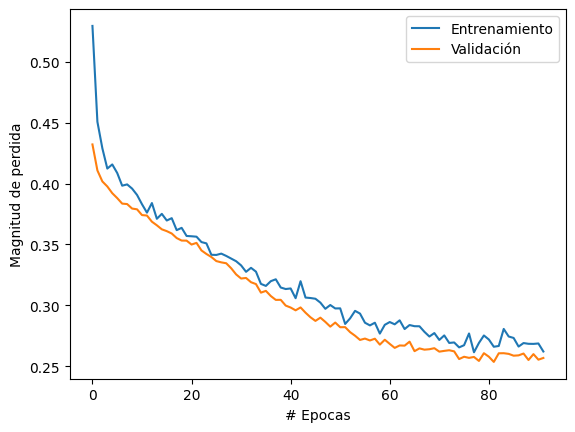

In [292]:
plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.legend(['Entrenamiento','Validación'])

In [294]:
# Realizar la predicción
print('Vamos a hacer una predicción')
nuevo_dato = np.array([[1, 3, 10, 70, 10,0,0,0,0,0,0,]])  # Ejemplo de nuevo dato con las 7 características numéricas
nuevo_dato[:, :5] = scaler.transform(nuevo_dato[:, :5])  # Escalar las características numéricas
resultado = modelo.predict(nuevo_dato)

print(f'El resultado es: {resultado[0][0]}') 

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
El resultado es: 0.009827423840761185


In [295]:
# Convertir la probabilidad a una predicción binaria
prediccion_binaria = (resultado > 0.5).astype(int)

# Imprimir el resultado y la predicción
print(f'El resultado es: {prediccion_binaria[0][0]}')
if prediccion_binaria[0][0] == 0:
    print(f'El resultado es: {prediccion_binaria[0][0]}, predicción: 0, No completara el curso')
else:
    print(f'El resultado es: {prediccion_binaria[0][0]}, predicción: 1, Completara eal curso')

El resultado es: 0
El resultado es: 0, predicción: 0, No completara el curso


In [296]:
# Realizar predicciones usando el modelo entrenado
predicciones = modelo.predict(X)

predicciones_binarias = (predicciones > 0.5).astype(int).flatten()

df['CourseCompletion_pred'] = predicciones_binarias

# Verificar las primeras filas del DataFrame con las predicciones
print(df.head())

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
   UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0    5618         Health          29.979719                     17   
1    4326           Arts          27.802640                      1   
2    5849           Arts          86.820485                     14   
3    4992        Science          35.038427                     17   
4    3866    Programming          92.490647                     16   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   

   CourseCompletion  CourseCompletion_pred  
0                 0                      0  
1                 0                      0 

In [297]:
# Comparar las predicciones con los valores reales
correct_prediction = (df['CourseCompletion'] == df['CourseCompletion_pred']).sum()

In [298]:
total_predicciones = len(df2)
precisión = (correct_prediction / total_predicciones) * 100
print(f'Precisión: {precisión:.2f}%')

margen_de_error = 100 - precisión
print(f'Margen de error: {margen_de_error:.2f}%')

Precisión: 94.58%
Margen de error: 5.42%


In [299]:
df['CourseCompletion'].value_counts()

CourseCompletion
0    5432
1    3568
Name: count, dtype: int64

In [300]:
df['CourseCompletion_pred'].value_counts()

CourseCompletion_pred
0    5572
1    3428
Name: count, dtype: int64

In [301]:
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCompletion_pred
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0,0


In [302]:
df['CourseCategory'].value_counts()

CourseCategory
Business       1837
Health         1821
Science        1814
Programming    1810
Arts           1718
Name: count, dtype: int64